In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVR

In [2]:
df = pd.read_csv('Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


Simple Linear Regression

In [12]:
x = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [14]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
salaryLinear = regressor.predict([[5.5]])

In [15]:
y_pred = regressor.predict(x_test)

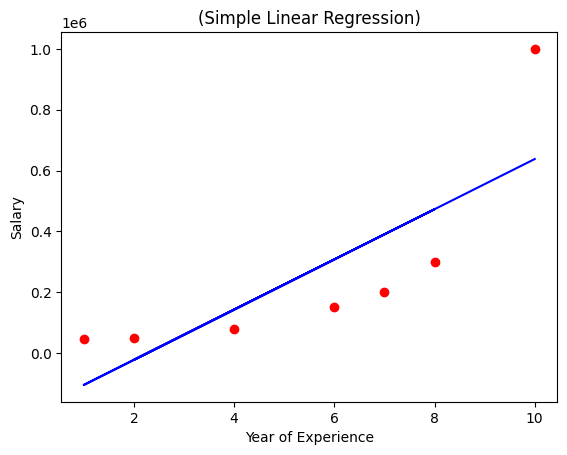

In [16]:
plt.scatter(x_train, y_train, color= 'red')
plt.plot(x_train, regressor.predict(x_train), color= 'blue')
plt.title('(Simple Linear Regression)')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()

Polyregression

In [17]:
poly_reg =PolynomialFeatures(degree=4)
x_poly = poly_reg.fit_transform(x)
lin_reg =LinearRegression()
lin_reg.fit(x_poly,y)
SalaryPloy = lin_reg.predict(poly_reg.transform([[5.5]]))

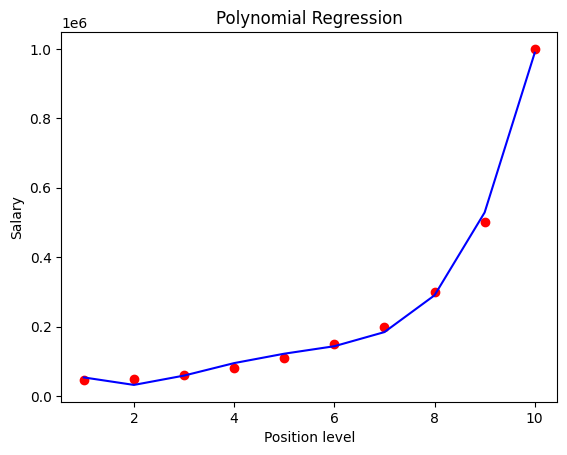

In [18]:
plt.scatter(x, y, color='red')
plt.plot(x, lin_reg.predict(poly_reg.transform(x)), color='blue')
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

SVR

In [22]:
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y.reshape(-1, 1))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

regressor = SVR(kernel='rbf')
regressor.fit(x, y)

levelSVR = sc_x.transform([[5.5]])
salaryLevel = regressor.predict(levelSVR.reshape(-1, 1))
salarySVR = sc_y.inverse_transform(salaryLevel.reshape(-1, 1))

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
regressor = SVR(kernel='rbf')
regressor.fit(x, y)

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [24]:
y_pred = regressor.predict(x_test[-1, np.newaxis])

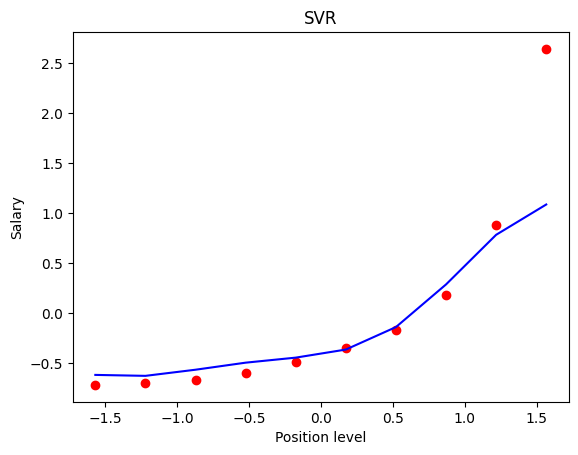

In [25]:
plt.scatter(x, y, color='red')
plt.plot(x, regressor.predict(x), color='blue')
plt.title('SVR')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [26]:
print('Salary simple Linear Regression: ', salaryLinear)
print('Salary Ploy Linear Regression: ', SalaryPloy)
print('Salary SVR: ', salarySVR)

Salary simple Linear Regression:  [266608.74439462]
Salary Ploy Linear Regression:  [132148.43749998]
Salary SVR:  [[131106.77303274]]


In my opinion:

Simple Linear Regression: The predicted salary of $266,608.74 may not accurately reflect the true 
salary of the new country manager because the relationship between the level and salary appears 
to be non-linear in the data.

Polynomial Linear Regression: The predicted salary of $132,148.44 takes into account the non-linear relationship between 
the level and salary by using polynomial features. However, without knowing the degree of the polynomial used, 
it is difficult to assess the reliability of this prediction.

Support Vector Regression: The predicted salary of $131,106.77 is based on the support vector regression model, 
which can capture non-linear relationships. However, without details about the kernel and other hyperparameters used, 
it is challenging to fully evaluate the reliability of this prediction.